# **1. Objective**

**Overview:** Integrate Probability and Statistics, Linear Regression, and Logistic Regression theories into a cohesive case study that demonstrates their application in predicting an outcome based on a given dataset.

**Goal:** Predict [Outcome] using the dataset provided, utilizing Linear and Logistic Regression models to analyze and interpret the results.

# **2. Dataset Preparation**

**Description:**

- The dataset is about the Titanic disaster and the demographic of the passengers. This includes the passenger IDs, the survivors, the passenger class (first class, second class, and third class), their names, their sex, age, siblings and spouses on board, parents or children on board, their ticket details, the fare they paid for, the cabins they're assigned in, and where they embarked from (C = Cherbourg, Q = Queenstown, S = Southampton).

- But I do have to note that by the number of male survivors in this dataset, and the percentage of male to female survivors, this dataset is just entirely inaccurate, and the source backs this up, as the author (BRENDA N. from Kaggle) mentions that this is just a combined dataset from a gender_submission and a Titanic test file. This is only for visualization practice.

**- Load the Dataset**

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import bernoulli
from scipy.stats import norm
import statsmodels.api as sm
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler


data = pd.read_csv('/content/tested.csv')
print(data.head())

   PassengerId  Survived  Pclass  \
0          892         0       3   
1          893         1       3   
2          894         0       2   
3          895         0       3   
4          896         1       3   

                                           Name     Sex   Age  SibSp  Parch  \
0                              Kelly, Mr. James    male  34.5      0      0   
1              Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                     Myles, Mr. Thomas Francis    male  62.0      0      0   
3                              Wirz, Mr. Albert    male  27.0      0      0   
4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   

    Ticket     Fare Cabin Embarked  
0   330911   7.8292   NaN        Q  
1   363272   7.0000   NaN        S  
2   240276   9.6875   NaN        Q  
3   315154   8.6625   NaN        S  
4  3101298  12.2875   NaN        S  


**- Handle Missing Values**

In [ ]:
print(data.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [ ]:
data['Age'] = data['Age'].fillna(data['Age'].median())
data['Fare'] = data['Fare'].fillna(data['Fare'].median())

# There is no way of filling in the missing values of the Cabin numbers, so it should be dropped
# data = data.drop('Cabin', axis=1)

print(data.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


**- Encode Categorical Values**

In [ ]:
data_encoded = pd.get_dummies(data, columns=['Sex', 'Embarked', 'Ticket'])
data_dummies = pd.get_dummies(data, drop_first = True)
print(data_encoded)

     PassengerId  Survived  Pclass  \
0            892         0       3   
1            893         1       3   
2            894         0       2   
3            895         0       3   
4            896         1       3   
..           ...       ...     ...   
413         1305         0       3   
414         1306         1       1   
415         1307         0       3   
416         1308         0       3   
417         1309         0       3   

                                             Name   Age  SibSp  Parch  \
0                                Kelly, Mr. James  34.5      0      0   
1                Wilkes, Mrs. James (Ellen Needs)  47.0      1      0   
2                       Myles, Mr. Thomas Francis  62.0      0      0   
3                                Wirz, Mr. Albert  27.0      0      0   
4    Hirvonen, Mrs. Alexander (Helga E Lindqvist)  22.0      1      1   
..                                            ...   ...    ...    ...   
413                            S

# **3. Exploratory Data Analysis**

**Probability and Statistics Concepts:**

In [ ]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,0.363636,2.265550,29.599282,0.447368,0.392344,35.576535
std,120.810458,0.481622,0.841838,12.703770,0.896760,0.981429,55.850103
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,23.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,35.750000,1.000000,0.000000,31.471875
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


- Probability of Survival (Bernoulli Distribution)

In [ ]:
survived = data['Survived'].mean()

bernoulli_dist = bernoulli(survived)

prob_survived = bernoulli_dist.pmf(1)
prob_not_survived = bernoulli_dist.pmf(0)

print("Probability of surviving:", prob_survived)
print("Probability of not surviving:", prob_not_survived)

Probability of surviving: 0.36363636363636365
Probability of not surviving: 0.6363636363636362


- Age Distribution

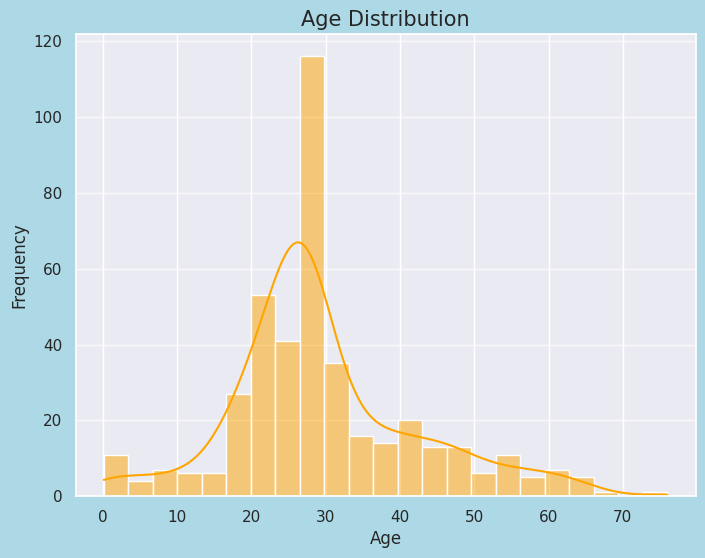

In [ ]:
age_data = data['Age'].dropna()

plt.figure(figsize=(8, 6), facecolor = 'lightblue')
sns.histplot(age_data, kde=True, color='orange')
plt.rcParams['figure.figsize'] = (12, 6)
plt.title('Age Distribution', fontsize=15)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', alpha=0.75)
plt.show()

In [ ]:
mu = age_data.mean()
sigma = age_data.std()

norm_dist = norm(mu, sigma)
prob_age = norm_dist.pdf(29)
print("Probability density at age 29: ", prob_age)

Probability density at age 29:  0.031368533880871054


**Visualization:**

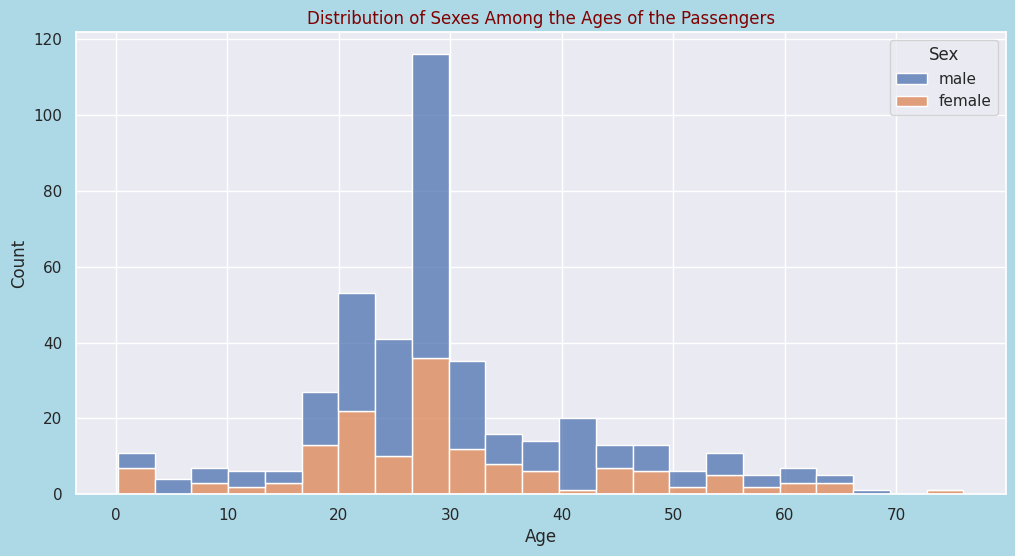

In [ ]:
sns.histplot(data = data, x='Age', hue='Sex', multiple='stack')
fig = plt.gcf()
fig.set_facecolor('lightblue')

plt.rcParams['figure.figsize'] = (12, 6)
plt.title('Distribution of Sexes Among the Ages of the Passengers', color='maroon')

plt.show()

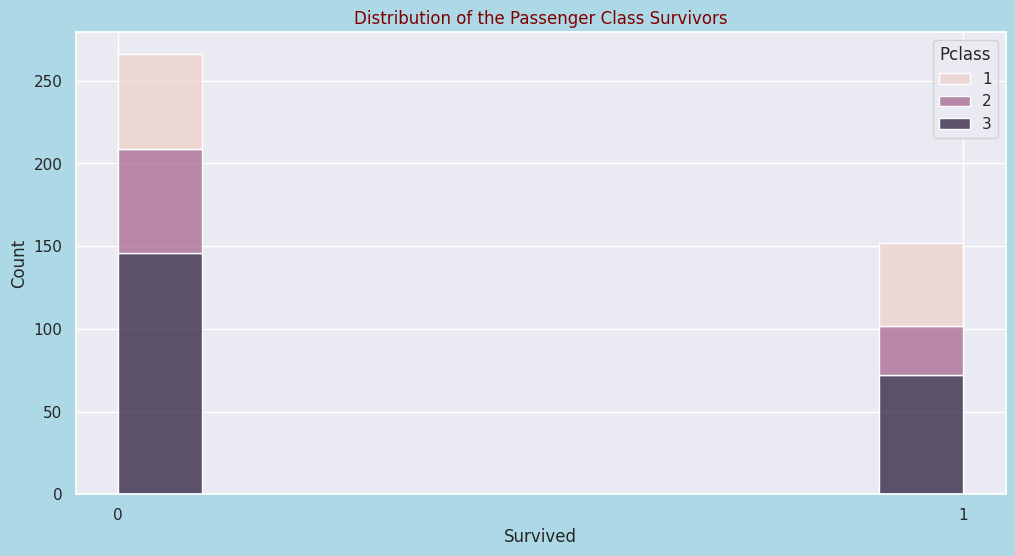

In [ ]:
sns.histplot(data = data, x='Survived', hue='Pclass', multiple='stack')
fig = plt.gcf()
fig.set_facecolor('lightblue')

plt.rcParams['figure.figsize'] = (12, 6)
plt.title('Distribution of the Passenger Class Survivors', color='maroon')
plt.xticks([0, 1])

plt.show()

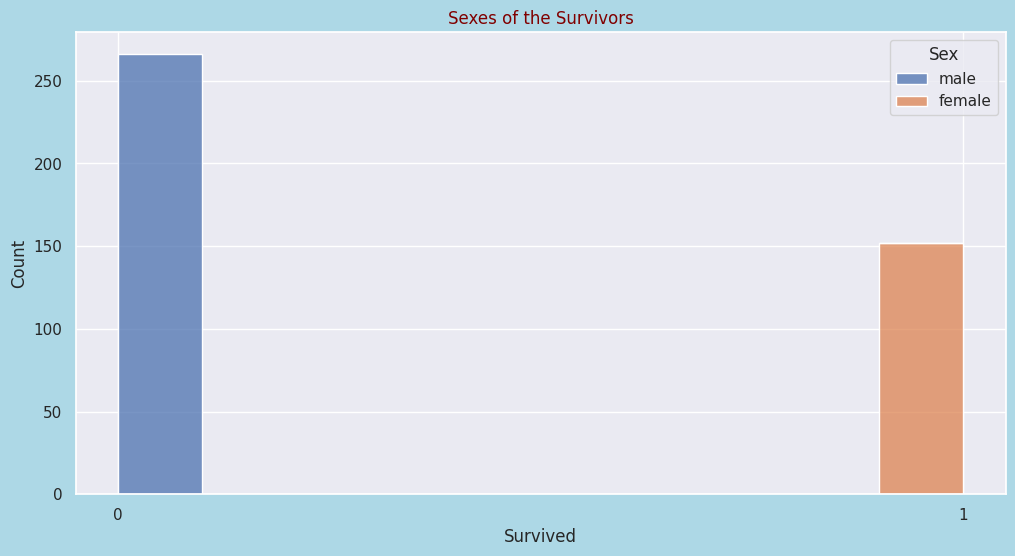

In [ ]:
sns.histplot(data = data, x='Survived', hue='Sex', multiple='stack')
fig = plt.gcf()
fig.set_facecolor('lightblue')

plt.rcParams['figure.figsize'] = (12, 6)
plt.title('Sexes of the Survivors', color='maroon')
plt.xticks([0, 1])

plt.show()

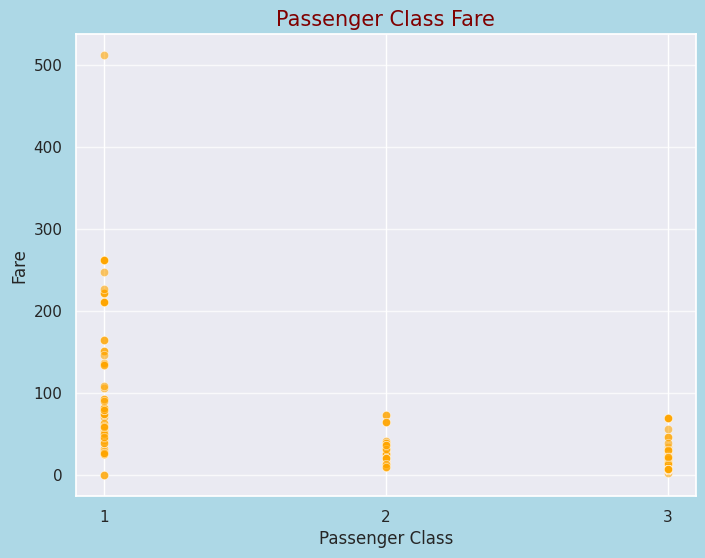

In [ ]:
plt.figure(figsize=(8, 6), facecolor = 'lightblue')
sns.scatterplot(x='Pclass', y='Fare', data=data, color='orange', alpha=0.6)
plt.rcParams['figure.figsize'] = (12, 6)
plt.title('Passenger Class Fare', fontsize=15, color = 'maroon')
plt.xlabel('Passenger Class', fontsize=12)
plt.ylabel('Fare', fontsize=12)
plt.xticks([1, 2, 3])
plt.grid(axis='y', alpha=0.75)
plt.show()

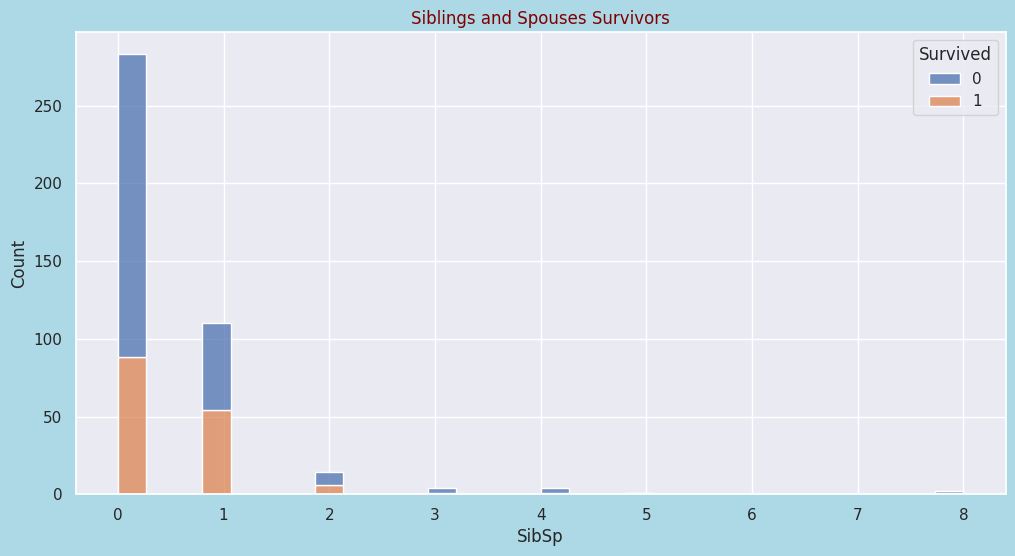

In [ ]:
sns.histplot(data = data, x='SibSp', hue='Survived', multiple='stack')
fig = plt.gcf()
fig.set_facecolor('lightblue')

plt.rcParams['figure.figsize'] = (12, 6)

plt.title('Siblings and Spouses Survivors', color='maroon')

plt.show()

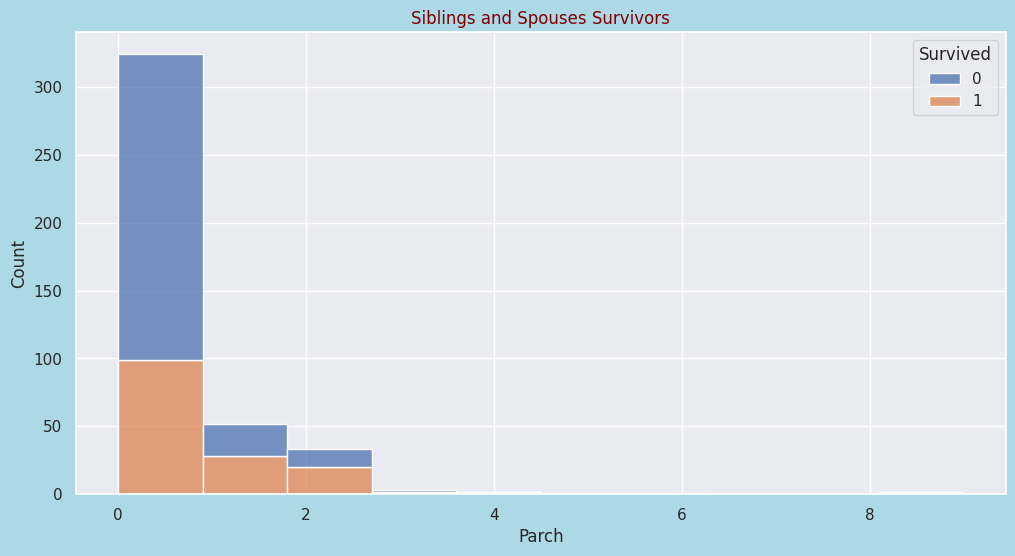

In [ ]:
sns.histplot(data = data, x='Parch', hue='Survived', multiple='stack')
fig = plt.gcf()
fig.set_facecolor('lightblue')

plt.rcParams['figure.figsize'] = (12, 6)
plt.title('Siblings and Spouses Survivors', color='maroon')

plt.show()

# **5. Logistic Regression Model**

- **Theory Recap:**



> Logistic regression is a predictive analysis of data when the dependent variable is binary or dichotomous. This means that its results take into consideration the independent variables and their influence on the dependent variable to produce a result that shows the probability of the dependent variable to be divided into binary categories (usually yes or no).

- **Implementation:**


1. Feature Selection


In [ ]:
data_dummies = pd.get_dummies(data, drop_first=True)
data_dummies['survival'] = (data['Survived'] == 1).astype(bool)

x = data_dummies.drop(['Age', 'Pclass', 'SibSp', 'Parch'], axis=1)
y = data_dummies['survival']

2. Model Fitting

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=80)

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

model = LogisticRegression()
model.fit(x_train_scaled, y_train)

LogisticRegression()

In [ ]:
y_pred = model.predict(x_test_scaled)

3. Coefficient Interpretation

In [ ]:
X = data[['Age', 'Pclass', 'SibSp', 'Parch']]
y = data['Survived']

model = LogisticRegression()
model.fit(X, y)

coefficients = model.coef_[0]
intercept = model.intercept_[0]

print("Intercept:", intercept)
print("Coefficients:", coefficients)

Intercept: 0.19303292774568218
Coefficients: [-0.00702202 -0.32432855  0.11749896  0.31109782]


- **Evaluation**

4. Model Evaluation

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix: ")
print(conf_matrix)
print(f"Classification Report: ")
print(class_report)


Accuracy: 1.0
Confusion Matrix: 
[[54  0]
 [ 0 30]]
Classification Report: 
              precision    recall  f1-score   support

       False       1.00      1.00      1.00        54
        True       1.00      1.00      1.00        30

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



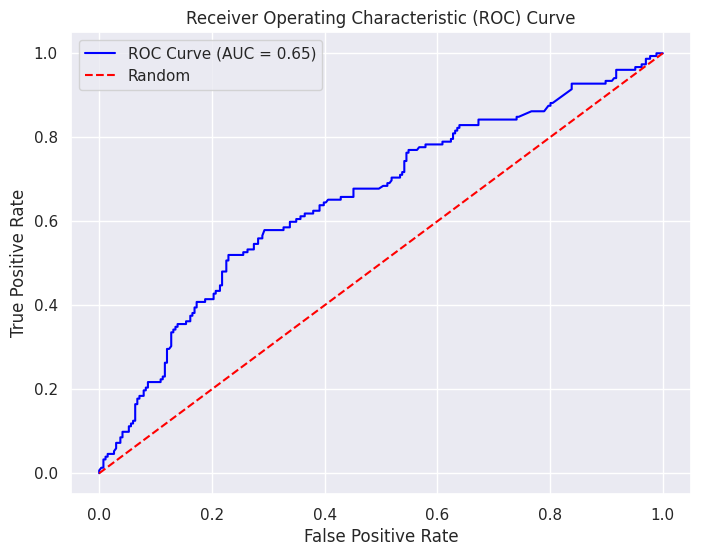

AUC Score: 0.6538385437277404


In [ ]:
X = data[['Age', 'Pclass', 'SibSp', 'Parch', 'Fare']]
y = data['Survived']

model = LogisticRegression()
model.fit(X, y)

y_prob = model.predict_proba(X)[:, 1]

fpr, tpr, thresholds = roc_curve(y, y_prob)

auc_score = roc_auc_score(y, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label='ROC Curve (AUC = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

print("AUC Score:", auc_score)

> The accuracy achieved a solid 1.0 score so the model correctly predicted all the instances in the test set based on the features Age, Passenger Class, whether they had Siblings or Spouses, and whether they had Parents and Children.

> The confusion matrix tells us that there were 54 correctly predicted instances of not surviving which would be the true negatives, and 30 instances of people surviving, which would be the true positives. There were no false positives or negatives.

> We can also see that all the precision, recall, and F1 score were all predicted perfectly, as all of them exhibit a score of 1.0.

> The AUC curve is 0.65, indicating that the model is a bit poor, but that is understandable, since there are missing values in the dataset, especially in the Age where I had to fill in the missing values with the Age mean.

# **6. Model Comparison and Selection**

> Linear Regression uses MSE (Mean Squared Error) and R-squared for its performance metric, where MSE averages the distance between predictions and actual values, lower MSE means more accuracy, while R-squared shows how the independent variables affect/not affect the dependent variable, if the R-squared is high, then there is a correlation, and if it's low, then there's little to no correlation.

> Linear regression is applicable to continuous numerical value, as each independent variable has a direct relationship with the dependent variable, but no relations with other independent variables. This is only applicable to continuous values, finding the trendline that appears in a scale of values.

> Logistic regression uses  Accuracy, Precision and Recall for its performance metric, where accuracy shows the correct predictions that were put into the correct category by the model, precision is how the model posits the true positives among predicted true positives, and recall is the proportion of how many true positives the model has predicted.

> Logistic Regression is applicable to analysis where you expect a binary outcome. It's about finding out a direct 'yes or no', categorical variables based on the independent variables. It is how well a model can categorize these variables into how likely or not they are to belong to a particular threshold.

> Based on these factors do you choose which model is more appropriate for a problem. The model accuracy will have to depend on the type of problems, if it's high accuracy or high precision. Linear regression is much easier to interpret as the coefficients will tell you how the features can affect the predicted value immediately, while logistic regression can sometimes be vague about how it categorized the values. Although, linear regression may not be always suitable to real-world data as it is dealing with continuous numerical values.

# **7. Conclusion and Insights**

- By applying statistical and machine learning methods to the Titanic survivor rate dataset, one major finding is how the features Age, Age, Passenger Class, whether they had Siblings or Spouses, and whether they had Parents and Children onboard, are all very likely to influence the survival rate of the passengers, with an accuracy of 1.0. This means that in real-world applications, this can be used as a basis for safety protocols in large ships, meaning, there are patterns that could lead to a higher survival rate among the demographic of the passengers, and these patterns can be utilized by making them more accessible to the general population.

- Although, there is a phenomenon called "suvivorship bias" where findings in a research or case study can be biased towards the survivors of a particular event. What it means to say is that the dataset can be (and actually is) incomplete data, where it's possible that by focusing on the features that made the model accurate, we are looking at a very small window that doesn't include the patterns that lead to the people who did not survive the sinking of the ship. So it's best to keep that in mind.

- Continuous refinement of the model is encouraged as to make the results more accurate, and I'm pretty sure that my model isn't that accurate because the data isn't. But considering what's actually in the dataset and the model that was trained on it, it was accurate on its own accord. Logistic regression can be a simple model, because it doesn't really capture the complex relationships between the independent variables and the dependent variables as they are only categorized to fit a certain requirement, which may or may not apply to other real-world applications.

# **8. References**

-	Installation — pandas 2.2.2 documentation. (n.d.). https://pandas.pydata.org/docs/getting_started/install.html
-	Linear vs Logistic Regression - Difference Between Machine Learning Techniques - AWS. (n.d.). Amazon Web Services, Inc. https://aws.amazon.com/compare/the-difference-between-linear-regression-and-logistic-regression/
-	matplotlib.pyplot — Matplotlib 3.5.3 documentation. (n.d.). https://matplotlib.org/3.5.3/api/_as_gen/matplotlib.pyplot.html
-	Nikolopoulou, K. (2024, January 12). What is survivorship bias? | Definition & Examples. Scribbr. https://www.scribbr.com/research-bias/survivorship-bias/
-	NumPy -. (n.d.). https://numpy.org/
-	Pain, A. (2023, August 17). Understanding evaluation metrics in machine learning: R-squared, adjusted R-squared, MSE, MAE, and RMSE. https://www.linkedin.com/pulse/understanding-evaluation-metrics-machine-learning-r-squared-pain/
-	Scipy.Stats.Bernoulli — SciPy v1.13.0 Manual. (n.d.). https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.bernoulli.html
-	SciPy.Stats.norm — SciPY V1.13.0 Manual. (n.d.). https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html
-	seaborn: statistical data visualization — seaborn 0.13.2 documentation. (n.d.). https://seaborn.pydata.org/
-	sklearn.linear_model.LogisticRegression. (n.d.). Scikit-learn. https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
-	sklearn.metrics.accuracy_score. (n.d.). Scikit-learn. https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html
-	sklearn.metrics.classification_report. (n.d.). Scikit-learn. https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html
-	sklearn.metrics.confusion_matrix. (n.d.). Scikit-learn. https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
-	sklearn.metrics.roc_auc_score. (n.d.). Scikit-learn. https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html
-	sklearn.metrics.roc_curve. (n.d.). Scikit-learn. https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html
-	sklearn.model_selection.train_test_split. (n.d.). Scikit-learn. https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
-	sklearn.preprocessing.StandardScaler. (n.d.). Scikit-learn. https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
-	Statistics Solutions. (2024, April 8). What is Logistic Regression? - Statistics Solutions. https://www.statisticssolutions.com/free-resources/directory-of-statistical-analyses/what-is-logistic-regression/
-	statsmodels 0.14.1. (n.d.). https://www.statsmodels.org/stable/index.html
-	Titanic dataset. (2021, December 2). Kaggle. https://www.kaggle.com/datasets/brendan45774/test-file
